# DATA PREPARATION AND CUSTOMER ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

#### Load data and check for null values

In [2]:
trans_data = pd.read_excel("QVI_transaction_data.xlsx")

In [3]:
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
trans_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
trans_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [6]:
trans_df = trans_data.copy()

In [7]:
purchase_behaviour = pd.read_csv("QVI_purchase_behaviour.csv")

In [8]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
purchase_behaviour.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [10]:
purchase_behaviour.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [11]:
trans_df["DATE"] = pd.to_datetime(trans_df["DATE"], unit= "D",origin = "1899-12-30")
print(trans_df['DATE'].dtype)


datetime64[ns]


In [12]:
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [13]:
trans_df["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

### Inorder to select chips from the given product names we have to remove the numbers and symbols first,

In [14]:
split_prod_name = trans_df["PROD_NAME"].str.replace(r"[0-9]+[gG]" ," ").str.replace(r"&", " ")


C:\Users\aswin\AppData\Local\Temp/ipykernel_25060/3299123164.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  split_prod_name = trans_df["PROD_NAME"].str.replace(r"[0-9]+[gG]" ," ").str.replace(r"&", " ")


In [15]:
split_prod_name.unique()

array(['Natural Chip        Compny SeaSalt ', 'CCs Nacho Cheese     ',
       'Smiths Crinkle Cut  Chips Chicken  ',
       'Smiths Chip Thinly  S/Cream Onion  ',
       'Kettle Tortilla ChpsHny Jlpno Chili  ',
       'Old El Paso Salsa   Dip Tomato Mild  ',
       'Smiths Crinkle Chips Salt   Vinegar  ',
       'Grain Waves         Sweet Chilli  ',
       'Doritos Corn Chip Mexican Jalapeno  ',
       'Grain Waves Sour    Cream Chives  ',
       'Kettle Sensations   Siracha Lime  ', 'Twisties Cheese      ',
       'WW Crinkle Cut      Chicken  ', 'Thins Chips Light   Tangy  ',
       'CCs Original  ', 'Burger Rings  ',
       'NCC Sour Cream      Garden Chives  ',
       'Doritos Corn Chip Southern Chicken  ', 'Cheezels Cheese Box  ',
       'Smiths Crinkle      Original  ',
       'Infzns Crn Crnchers Tangy Gcamole  ',
       'Kettle Sea Salt     And Vinegar  ',
       'Smiths Chip Thinly  Cut Original  ', 'Kettle Original  ',
       'Red Rock Deli Thai  Chilli Lime  ',
       'Pring

In [16]:
## counting the number of times a product appears
word_counts = pd.Series(' '.join(split_prod_name).split()).value_counts()
# display counts in descending order 
print(pd.Series(word_counts).sort_values(ascending=False))

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Length: 196, dtype: int64


### Removing SALSA from the given data 


In [17]:
trans_df = trans_df[trans_df["PROD_NAME"].str.contains("[Ss]alsa") == False]
trans_df.describe()


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [18]:
trans_df.shape

(246742, 8)

In [19]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [20]:
trans_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [21]:
### From the above result we can see there is no null values  
trans_df.sort_values(by="PROD_QTY", ascending=False).head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
69486,2019-05-16,45,45006,40460,37,Smiths Thinly Swt Chli&S/Cream175G,5,15.0
69483,2018-08-15,43,43126,39445,25,Pringles SourCream Onion 134g,5,18.5
69474,2018-08-18,33,33138,30332,68,Pringles Chicken Salt Crips 134g,5,18.5
69472,2018-08-17,32,32193,29196,110,WW Original Corn Chips 200g,5,9.5


<AxesSubplot:>

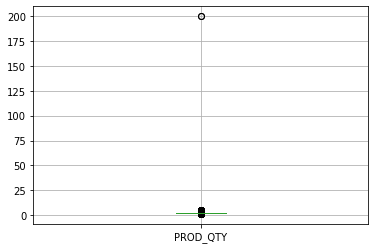

In [22]:
### There is atleat one item where the quantity is 200 which can possibly be an outler.
trans_df.boxplot(column = "PROD_QTY")

 ### We have 2 outliers and going to filter the entries that have Product quantity- 200. Here we will filter using the card number 22600.
 

In [23]:
# filter the entries by the customer 
trans_df.loc[trans_df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [24]:
# remove the outliers 
trans_df = trans_df[trans_df["LYLTY_CARD_NBR"] != 226000]
trans_df.shape

(246740, 8)

In [25]:
trans_df["DATE"].describe()

C:\Users\aswin\AppData\Local\Temp/ipykernel_25060/2292363385.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trans_df["DATE"].describe()


count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [26]:
# There is one day of data missing. First check the range of dates by sorting in time order. 
trans_df.sort_values(by='DATE')


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
9161,2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4
155442,2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2
181349,2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
229948,2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0
104647,2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4
...,...,...,...,...,...,...,...,...
10254,2019-06-30,112,112141,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0
113220,2019-06-30,207,207155,205513,99,Pringles Sthrn FriedChicken 134g,2,7.4
229182,2019-06-30,10,10140,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0
229015,2019-06-30,6,6258,6047,29,French Fries Potato Chips 175g,1,3.0


### by finding the difference between the date by checking through the years. we can find which day the data is missing.

In [27]:

missing_date = pd.date_range(start=trans_df["DATE"].min(), end=trans_df["DATE"].max())
missing_date.difference(trans_df["DATE"])
print(missing_date.difference(trans_df["DATE"]))

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


###### December 25 is Christmas and can be considered as a public holiday. On that day the sale is not happened and that is why the data is missing .

In [28]:
# Insert a new column to data with packet sizes and extract sizes from product name column
trans_df.insert(8, "PACKET_SIZE", trans_df["PROD_NAME"].str.extract("(\d+)").astype(float), True)

In [29]:
# Sort by packet sizes to check for outliers 
trans_df.sort_values(by='PACKET_SIZE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE
40783,2018-09-25,97,97067,96696,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
42461,2019-05-05,110,110030,111890,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
176183,2018-12-30,82,82183,81660,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
227309,2018-12-03,236,236091,239098,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
42418,2018-11-05,109,109217,111470,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
...,...,...,...,...,...,...,...,...,...
192034,2019-03-12,100,100121,99145,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
255797,2019-01-19,235,235098,238018,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
233814,2019-01-24,151,151102,149810,4,Dorito Corn Chp Supreme 380g,1,6.5,380.0
131573,2018-07-09,213,213087,212416,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0


In [30]:
#to check the data in pack size 
trans_df["PACKET_SIZE"].unique()


array([175., 170., 150., 330., 210., 270., 220., 125., 110., 134., 380.,
       180., 165., 135., 250., 200., 160., 190.,  90.,  70.])

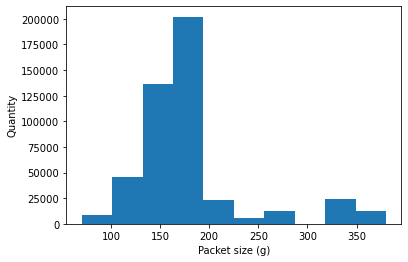

In [31]:
# Minimum packet size is 70g while max is 380g - this is reasonable. 
# Plot a histogram to visualise distribution of pack sizes. 
plt.hist(trans_df['PACKET_SIZE'], weights =trans_df['PROD_QTY']);
plt.xlabel('Packet size (g)');
plt.ylabel('Quantity');

In [32]:

trans_df["PROD_NAME"].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64

### Extracting brand names from the product names 

In [33]:
trans_df.insert(9,"BRAND_NAME",trans_df["PROD_NAME"].str.split().str.get(0), True)

In [34]:
trans_df.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210.0,Grain
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150.0,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210.0,Grain
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,Smiths


In [35]:
trans_df["BRAND_NAME"].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

### Some of the brand names look like they are similar. 
#### Create a function to replace some names 

In [36]:
def replace_brandname(line):
    name = line["BRAND_NAME"]
    if name   == "Red":
        return "Red Rock Deli"
    elif name == "RRD":
        return "Red Rock Deli"
    elif name == 'Grain':
        return "Grain waves"
    elif name == "GrnWves":
        return "Grain waves"
    elif name == "Smith":
        return "Smiths"
    elif name == 'Infzns':
        return 'Infuzions'
    elif name == 'WW':
        return 'Woolworths'
    elif name == 'Snbts':
        return "Sunbites"
    elif name == 'Dorito':
        return 'Doritos'
    else:
        return name 

In [37]:
# Then apply the function to clean the brand names
trans_df["BRAND_NAME"] = trans_df.apply(lambda line: replace_brandname(line), axis= 1)

In [38]:
trans_df["BRAND_NAME"].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain waves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

#### The brand names looks clear and the results are looking reasonable withput any duplicates.

### Customer data Analysis.

In [39]:
# Now examine customer data
customer_df = purchase_behaviour.copy()
customer_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [40]:
customer_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [41]:
customer_df["PREMIUM_CUSTOMER"].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

### Merge data sets 

In [42]:
merge_data = pd.merge(trans_df,purchase_behaviour,on = "LYLTY_CARD_NBR", how = "right" )

In [43]:
merge_data.head(20)



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1.0,1002,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,150.0,Red Rock Deli,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1.0,1003,3.0,52.0,Grain Waves Sour Cream&Chives 210G,1.0,3.6,210.0,Grain waves,YOUNG FAMILIES,Budget
3,2019-03-08,1.0,1003,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,175.0,Natural,YOUNG FAMILIES,Budget
4,2018-11-02,1.0,1004,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,160.0,Woolworths,OLDER SINGLES/COUPLES,Mainstream
5,2018-12-28,1.0,1005,6.0,86.0,Cheetos Puffs 165g,1.0,2.8,165.0,Cheetos,MIDAGE SINGLES/COUPLES,Mainstream
6,2018-12-04,1.0,1007,7.0,49.0,Infuzions SourCream&Herbs Veg Strws 110g,1.0,3.8,110.0,Infuzions,YOUNG SINGLES/COUPLES,Budget
7,2018-12-05,1.0,1007,8.0,10.0,RRD SR Slow Rst Pork Belly 150g,1.0,2.7,150.0,Red Rock Deli,YOUNG SINGLES/COUPLES,Budget
8,2018-11-20,1.0,1009,9.0,20.0,Doritos Cheese Supreme 330g,1.0,5.7,330.0,Doritos,NEW FAMILIES,Premium
9,2018-09-09,1.0,1010,10.0,51.0,Doritos Mexicana 170g,2.0,8.8,170.0,Doritos,YOUNG SINGLES/COUPLES,Mainstream


In [44]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248090 entries, 0 to 248089
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  float64       
 2   LYLTY_CARD_NBR    248090 non-null  int64         
 3   TXN_ID            246740 non-null  float64       
 4   PROD_NBR          246740 non-null  float64       
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  float64       
 7   TOT_SALES         246740 non-null  float64       
 8   PACKET_SIZE       246740 non-null  float64       
 9   BRAND_NAME        246740 non-null  object        
 10  LIFESTAGE         248090 non-null  object        
 11  PREMIUM_CUSTOMER  248090 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 24.6+ MB


##### we already merged the data and we have done the customer data Exploration.

### Data analysis on customer segments.
####  The data has been cleaned already and now check for some interesting insights on chip market.


#### Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
###### - How many customers are in each segment
###### - How many chips are bought per customer by segment
###### - What's the average chip price by customer segment
#### We could also ask our data team for more information. Examples are:
###### - The customer's total spend over the period and total spend for each transaction
######           to understand what proportion of their grocery spend is on chips
###### - Proportion of customers in each customer segment overall to compare against the
######            mix of customers who purchase chips

In [45]:
#### Life stage analysis
merge_data["LIFESTAGE"].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [46]:
merge_data.LIFESTAGE.value_counts()

OLDER SINGLES/COUPLES     51013
RETIREES                  46681
OLDER FAMILIES            45308
YOUNG FAMILIES            40636
YOUNG SINGLES/COUPLES     34366
MIDAGE SINGLES/COUPLES    23532
NEW FAMILIES               6554
Name: LIFESTAGE, dtype: int64

Text(0.5, 1.0, 'Lifestage sales break down')

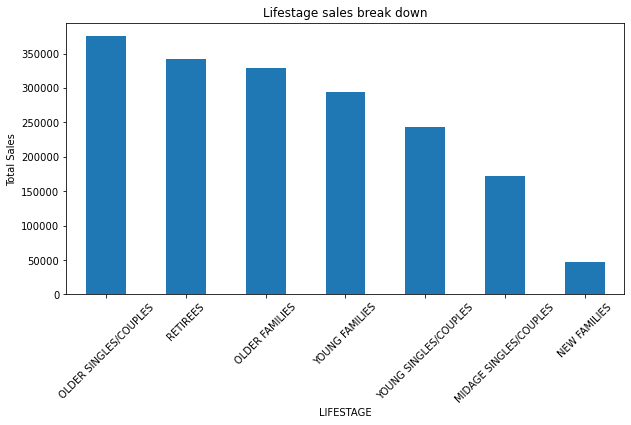

In [47]:
## using bar plot we can observe which lifestage consume most
lifestage_consume = merge_data.groupby('LIFESTAGE').TOT_SALES.sum().sort_values(ascending = False)
lifestage_consume.plot(figsize=(10,5),kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.title('Lifestage sales break down')

In [48]:
print(lifestage_consume)

LIFESTAGE
OLDER SINGLES/COUPLES     376019.65
RETIREES                  342381.90
OLDER FAMILIES            328519.90
YOUNG FAMILIES            294627.90
YOUNG SINGLES/COUPLES     243756.60
MIDAGE SINGLES/COUPLES    172523.80
NEW FAMILIES               47347.95
Name: TOT_SALES, dtype: float64


In [49]:
#PREMIUM_CUSTOMER Analysis.
merge_data.PREMIUM_CUSTOMER.value_counts()
#There are three types of customer categories.

Mainstream    95554
Budget        87226
Premium       65310
Name: PREMIUM_CUSTOMER, dtype: int64

In [50]:
Member_consume = merge_data.groupby("PREMIUM_CUSTOMER").TOT_SALES.sum().sort_values(ascending = False)
print(Member_consume)

PREMIUM_CUSTOMER
Mainstream    700865.40
Budget        631406.85
Premium       472905.45
Name: TOT_SALES, dtype: float64


Text(0.5, 1.0, 'Premium customer sales break down')

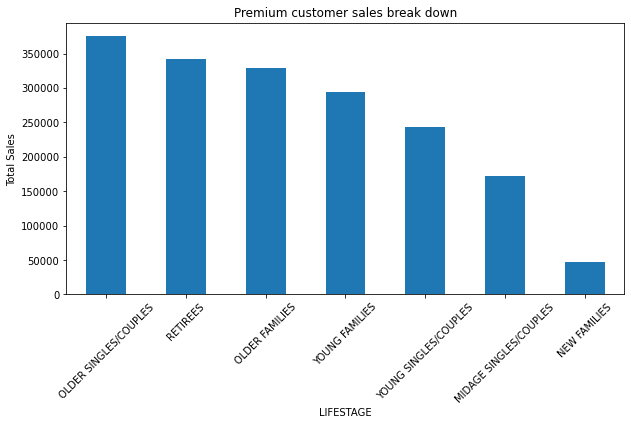

In [51]:
### Plot using bargraph 
lifestage_consume.plot(figsize=(10,5),kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.title('Premium customer sales break down')

#### From the above results, older singles/couples consume more. 

In [52]:
### Calculate total sales and average sales by Lifestage, Premium customer and generate a list
total_sales = merge_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"], as_index = False)["TOT_SALES"].agg(["sum", "mean"])
total_sales = pd.DataFrame(total_sales)
total_sales.sort_values(ascending = False, by ="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

In [53]:
customer_num = merge_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).LYLTY_CARD_NBR.nunique().sort_values(ascending = False)
customer_num = pd.DataFrame(customer_num)
customer_num = customer_num.rename(columns = {'LYLTY_CARD_NBR':'Number of Customer'})
customer_num

Number of Customer
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 8088
                 RETIREES                              6479
                 OLDER SINGLES/COUPLES                 4930
Budget           OLDER SINGLES/COUPLES                 4929
Premium          OLDER SINGLES/COUPLES                 4750
Budget           OLDER FAMILIES                        4675
                 RETIREES                              4454
                 YOUNG FAMILIES                        4017
Premium          RETIREES                              3872
Budget           YOUNG SINGLES/COUPLES                 3779
Mainstream       MIDAGE SINGLES/COUPLES                3340
                 OLDER FAMILIES                        2831
                 YOUNG FAMILIES                        2728
Premium          YOUNG SINGLES/COUPLES                 2574
                 YOUNG FAMILIES                        2433
                 MIDAGE SINGLES/COUPLES                2431
                 OLDER FAMILIES                        2274
Budget           MIDAGE SINGLES/COUPLES                1504
                 NEW FAMILIES                          1112
Mainstream       NEW FAMILIES                           849
Premium          NEW FAMILIES                           588

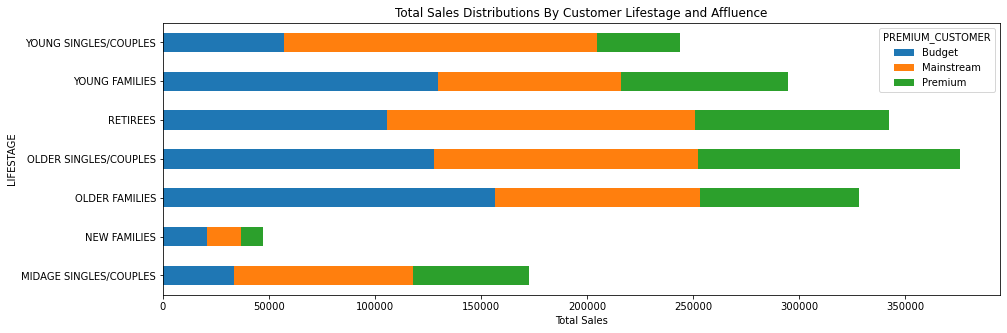

In [54]:
#### To find the customers in each segment by considering both life stages and premium customers we now plot the graph.

# Plot a breakdown of the total sales by lifestage and member type
total_sales_num = total_sales.unstack("PREMIUM_CUSTOMER").fillna(0)
ax = total_sales_num['sum'].plot(kind='barh', stacked=True, figsize=(15, 5))

for rect in ax.patches:
 # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
# Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
        
    ax.set_xlabel("Total Sales")
ax.set_title('Total Sales Distributions By Customer Lifestage and Affluence')
plt.show()

Text(0.5, 1.0, 'Customer number by segments')

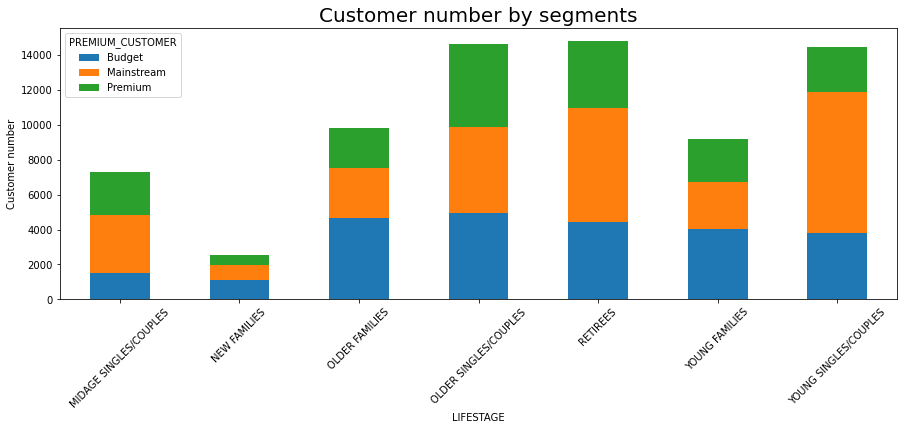

In [55]:
### plotting graph based on the customer number and lifestage.
merge_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique().unstack().plot(kind='bar',stacked = True,
                                                                              figsize=(15,5))
plt.xticks(rotation = 45)
plt.ylabel('Customer number')
plt.title('Customer number by segments',size=20)

### Findings
##### There are more Older singles/couples - all streams and Retirees - mainstream and young singles/ couples- mainstream who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the New families -Premium  segment.
##### OLDER FAMLY comes in 4th place in number but contribute the 3rd most total sales.



In [56]:
#### Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER.
# Create a column for the unit price of chips purchased per transaction 
merge_data['UNIT_PRICE'] = merge_data['TOT_SALES']/merge_data['PROD_QTY']

In [57]:
# Plot the distribution of the average unit price per transaction by LIFESTAGE and MEMBER_TYPE.
avg_priceperunit = merge_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index = False)['UNIT_PRICE'].agg(['mean']).unstack('PREMIUM_CUSTOMER').fillna(0)
print(avg_priceperunit)


                            mean                     
PREMIUM_CUSTOMER          Budget Mainstream   Premium
LIFESTAGE                                            
MIDAGE SINGLES/COUPLES  3.743328   3.994241  3.770698
NEW FAMILIES            3.917688   3.916133  3.872110
OLDER FAMILIES          3.745340   3.737077  3.717000
OLDER SINGLES/COUPLES   3.882096   3.814665  3.893182
RETIREES                3.924404   3.844294  3.920942
YOUNG FAMILIES          3.760737   3.724533  3.762150
YOUNG SINGLES/COUPLES   3.657366   4.065642  3.665414


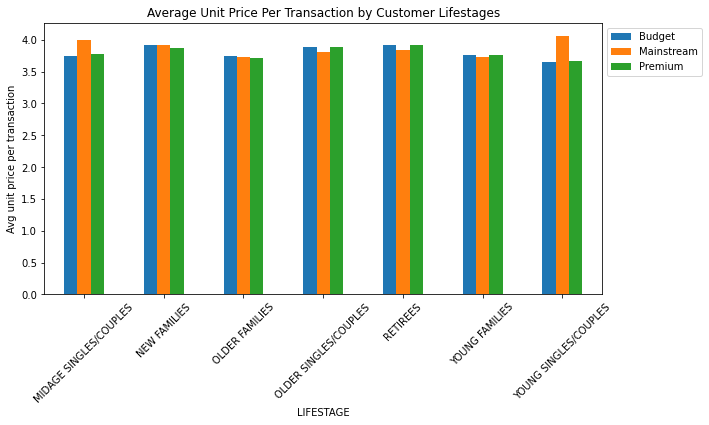

In [58]:
# Plot a graph
ax = avg_priceperunit['mean'].plot.bar(stacked=False, figsize=(10, 5))

# Set Labels and Titles

ax.set_ylabel("Avg unit price per transaction")
ax.set_title('Average Unit Price Per Transaction by Customer Lifestages')


plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45)
plt.show()

### Findings
###### For young single/couples and midagesingles/couples, the mainstreams are willing to spend more money per transaction compared to budget and premium category. In the case of mainstream group,they spend more money to buy chips packet compared to other groups.

### The difference in average price per unit transaction is not showing much variation. Independent t test can be used to check the significance of their difference mainly between the mainstreams-young single/couples and midagesingles/couples


In [59]:
# Check the difference in the average price unit between groups for young/midage singles/couples -Mainstream and Premium budget.
from scipy.stats import ttest_ind

In [60]:
# Identify the groups to test the hypthesis with 
mainstream = merge_data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merge_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merge_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")
premium_budget = merge_data["PREMIUM_CUSTOMER"] != "Mainstream"

group1 = merge_data[mainstream & young_midage]["UNIT_PRICE"]
group2 = merge_data[premium_budget & young_midage]["UNIT_PRICE"]

print(group1)
print(group2)

1         2.7
5         2.8
9         4.4
19        4.6
20        3.0
         ... 
248062    3.6
248075    4.3
248081    5.4
248085    6.5
248089    5.7
Name: UNIT_PRICE, Length: 30852, dtype: float64
0         3.0
6         3.8
7         2.7
27        3.0
28        3.0
         ... 
248046    3.3
248060    2.6
248061    5.4
248068    2.3
248074    4.4
Name: UNIT_PRICE, Length: 27046, dtype: float64


In [62]:
# Generate the t-test 
stat, pval = ttest_ind(group1.values, group2.values, equal_var = False)

print(pval, stat)

# Determine if the results are statistically significant
alpha = 0.05 # significance level
if pval < alpha:
    print("The results are statistically significant at the", alpha, "level.")
else:
    print("The results are not statistically significant at the", alpha, "level.")

nan nan
The results are not statistically significant at the 0.05 level.


##### Here the the p-value is nan which says that the young single/couples and midagesingles/couples in mainstream category has spend significantly higher amount (unit price) than the premium category young - single/couples and midagesingles/couples

## Deep dive into mainstream- young - single/couples 

##### We have found quite a few interesting insights that we can dive deeper into. We might want to target customer segments that contribute the most to sales toretain them or further increase sales. Let's look at Mainstream - youngsingles/couples.
##### For instance, let's find out if they tend to buy a particularbrand of chips.

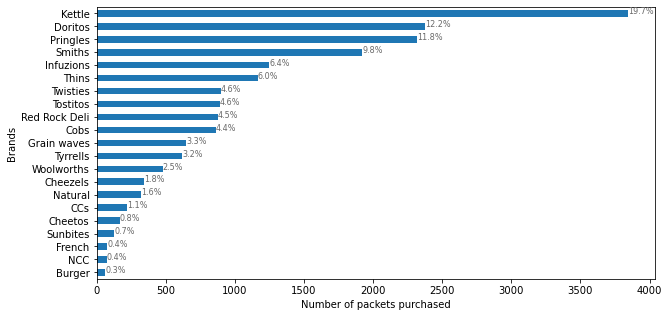

In [63]:
# Create a visual of what brands of mainstream- young singles are purchasing the most for a general brand
yung_m_stream = merge_data.loc[merge_data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
yung_m_stream = yung_m_stream.loc[yung_m_stream["PREMIUM_CUSTOMER"] == "Mainstream"]
                                                         
ax = yung_m_stream["BRAND_NAME"].value_counts().sort_values(ascending = True).plot.barh(figsize=(10, 5))

totals = []

# find the values and append to list
for rect in ax.patches:
    totals.append(rect.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for rect in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(rect.get_width()+.5, rect.get_y()+.4, \
            str(round((rect.get_width()/total)*100, 1))+'%', fontsize=8,
color='dimgrey', va='center')
ax.set_xlabel("Number of packets purchased")
ax.set_ylabel("Brands")
plt.show()

### Young singles/couples in mainstream category are interested in purchasing "Kettle" as their favorite chips brand.

#### using affinity index check if there are brands this segment prefers more than the other segments to target.

In [71]:
# find the target rating proportion
target_segment = yung_m_stream["BRAND_NAME"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='target')
target_segment.target /= yung_m_stream["PROD_QTY"].sum()

# find the other rating proportion
not_yung_m_stream = merge_data.loc[merge_data['LIFESTAGE'] != "YOUNG SINGLES/COUPLES"]
not_yung_m_stream = not_yung_m_stream.loc[not_yung_m_stream["PREMIUM_CUSTOMER"] != "Mainstream"]
other = not_yung_m_stream["BRAND_NAME"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='other')
other.other /= not_yung_m_stream["PROD_QTY"].sum()

# join the two dataframes 
brand_proportions = target_segment.set_index('BRANDS').join(other.set_index('BRANDS'))
# full_df = trans_df.set_index('LYLTY_CARD_NBR').join(cust_df.set_index('LYLTY_CARD_NBR'))
brand_proportions = brand_proportions.reset_index()
brand_proportions['affinity'] = brand_proportions['target']/brand_proportions['other']
brand_proportions.sort_values(by = 'affinity', ascending = False)

,BRANDS,target,other,affinity
9,Tyrrells,0.017088,0.013368,1.278270
14,Twisties,0.024845,0.019632,1.265496
19,Doritos,0.065673,0.052511,1.250646
13,Tostitos,0.024569,0.019944,1.231911
20,Kettle,0.106115,0.086574,1.225712
18,Pringles,0.063906,0.052477,1.217793
11,Cobs,0.023851,0.020004,1.192293
16,Infuzions,0.034507,0.029930,1.152890
10,Grain waves,0.017833,0.016214,1.099878
15,Thins,0.032188,0.029771,1.081172


###### By using the affinity index, we can see that 
###### mainstream young singles/couples are more likely to purcahse Tyrrells chips than the other segments.

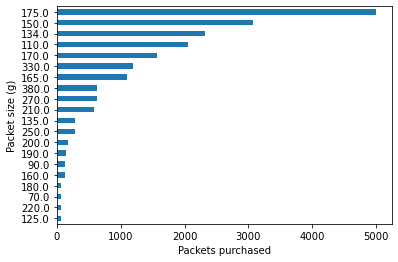

In [65]:
# Plot the distribution of the packet sizes for a general indication of what it most popular. 
yung_m_stream = merge_data.loc[merge_data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
yung_m_stream = yung_m_stream.loc[yung_m_stream["PREMIUM_CUSTOMER"] == "Mainstream"]
                                                         
ax = yung_m_stream["PACKET_SIZE"].value_counts().sort_values(ascending = True).plot.barh()
ax.set_ylabel("Packet size (g)")
ax.set_xlabel("Packets purchased")
plt.show()

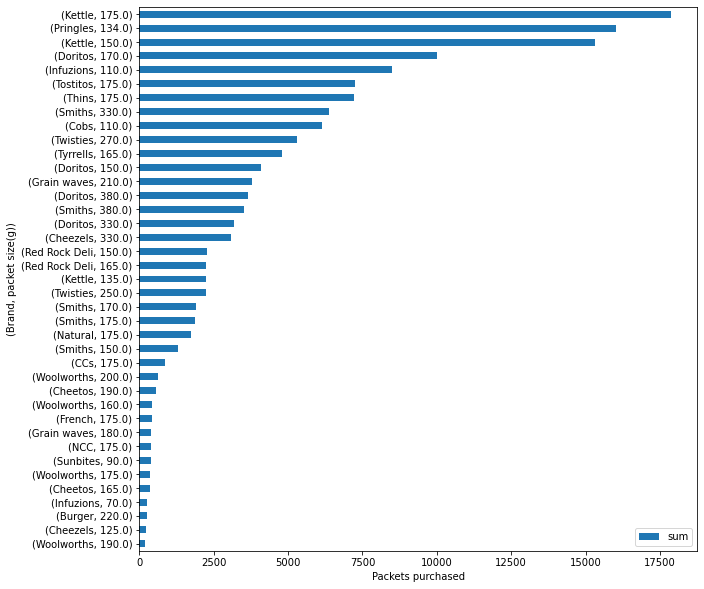

In [67]:
# Also want to check which brands correspond to what sized packets. 
brand_size = yung_m_stream.groupby(['BRAND_NAME','PACKET_SIZE'], as_index = False)['TOT_SALES'].agg(['sum'])
ax = brand_size.sort_values(by = 'sum').plot.barh(y = "sum", figsize=(10,10))
ax.set_ylabel("(Brand, packet size(g))")
ax.set_xlabel("Packets purchased")
plt.show()

#### Except some cases most of the people purchased chips of more than 150gms. In this case the top five chips brand are Kettle(175g,150g), Pringles,Infuzions,and Doritos. The Doritos and Infuzions are less than 150 g which are exceptions. The number of packets purchased from the top four brands is more than 10000.


## Summary Insights
##### The largest population group is mainstream young singles/couples, followed by mainstream retirees which explains their large total sales. While population is not a driving factor for budget older families, older families and young families in general buy more chips per customer. Furthermore, mainstream young singles/couples have the highest spend per purchase, which is statistically significant compared to the non-mainstream young singles/couples. 


##### We can use the fact that Tyrells andTwisties chips are more likely to be purchased by mainstream young singles/couples if they are placed in the right place. Furthermore, given that Kettles chips are still the most popular, if the primary target segment are mainstream young singles/couples, Tyrells and Twisties could be placed closer to the Kettles chips.